# KNN Regressor

## Macros

### Imports

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, auc, roc_curve
import pickle as pkl
from os.path import join
import plotly.express as px
import matplotlib.pyplot as plt

### Defines

In [24]:
DATA_PATH=join("..", "..", "..", "resources", "database", "knn_data.pkl")

with open(DATA_PATH, "rb") as file:
    x_train, x_test, y_train, y_test= pkl.load(file)

## Data Manipulation

### Model Fit

In [25]:
model = KNeighborsRegressor()

model.fit(x_train, y_train)

KNeighborsRegressor()

In [26]:
predict = model.predict(x_test)

predict

array([[ 46.8],
       [ 53. ],
       [ 53. ],
       [ 86.6],
       [ 80. ],
       [ 53. ],
       [ 18.4],
       [ 76.6],
       [ 35.6],
       [ 86.6],
       [ 24.6],
       [ 76.6],
       [ 21.2],
       [ 24.4],
       [ 24.4],
       [ 27. ],
       [ 59.8],
       [ 24. ],
       [131.8],
       [ 51.6],
       [ 53. ],
       [ 42.8],
       [ 18.4],
       [ 51.6],
       [ 49.8],
       [ 57. ],
       [ 80. ],
       [ 75. ],
       [ 57.6],
       [121.8],
       [ 49.8]])

In [27]:
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)

print(f"""
MSE: {mse:.2f}
MAE: {mae:.2f}
R2 Score: {r2:.2f}
""")


MSE: 1418.97
MAE: 28.50
R2 Score: 0.12



In [28]:
r2_list = []

for i in range(1, 50):
    model = KNeighborsRegressor(n_neighbors=i)

    model.fit(x_train, y_train)

    predict = model.predict(x_test)
    score = round(r2_score(y_test, predict), 2)
    print(f"n_neighborns: {i}\nr2_score: {score}")

    r2_list.append(score)

px.line(r2_list)

n_neighborns: 1
r2_score: -0.05
n_neighborns: 2
r2_score: 0.66
n_neighborns: 3
r2_score: 0.6
n_neighborns: 4
r2_score: 0.38
n_neighborns: 5
r2_score: 0.12
n_neighborns: 6
r2_score: 0.06
n_neighborns: 7
r2_score: 0.06
n_neighborns: 8
r2_score: 0.03
n_neighborns: 9
r2_score: 0.07
n_neighborns: 10
r2_score: 0.08
n_neighborns: 11
r2_score: 0.04
n_neighborns: 12
r2_score: 0.05
n_neighborns: 13
r2_score: 0.06
n_neighborns: 14
r2_score: 0.04
n_neighborns: 15
r2_score: -0.0
n_neighborns: 16
r2_score: -0.0
n_neighborns: 17
r2_score: -0.04
n_neighborns: 18
r2_score: -0.07
n_neighborns: 19
r2_score: -0.12
n_neighborns: 20
r2_score: -0.16
n_neighborns: 21
r2_score: -0.16
n_neighborns: 22
r2_score: -0.16
n_neighborns: 23
r2_score: -0.14
n_neighborns: 24
r2_score: -0.14
n_neighborns: 25
r2_score: -0.11
n_neighborns: 26
r2_score: -0.11
n_neighborns: 27
r2_score: -0.09
n_neighborns: 28
r2_score: -0.09
n_neighborns: 29
r2_score: -0.11
n_neighborns: 30
r2_score: -0.1
n_neighborns: 31
r2_score: -0.1
n_ne

No geral, o melhor valor para K é o teto(ln(n_colunas))

In [29]:
# Melhor modelo

best_model = KNeighborsRegressor(
    n_neighbors=2
)

best_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

### Predict

In [30]:
predict = best_model.predict(x_test)

predict

array([[ 28. ],
       [ 55. ],
       [ 55. ],
       [ 54. ],
       [ 45. ],
       [ 55. ],
       [ 12.5],
       [127.5],
       [ 54. ],
       [ 54. ],
       [ 27.5],
       [127.5],
       [ 20. ],
       [ 25.5],
       [ 25.5],
       [ 37.5],
       [110.5],
       [ 21.5],
       [ 19.5],
       [ 16.5],
       [ 55. ],
       [ 67.5],
       [ 12.5],
       [ 27.5],
       [ 70. ],
       [ 82.5],
       [ 30. ],
       [ 85. ],
       [ 95.5],
       [200. ],
       [ 70. ]])

In [31]:
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)

print(f"""
MSE: {mse:.2f}
MAE: {mae:.2f}
R2 Score: {r2:.2f}
""")


MSE: 540.71
MAE: 15.39
R2 Score: 0.66



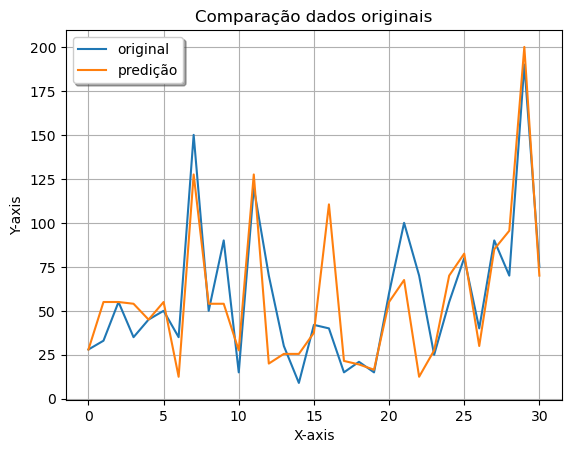

In [32]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predict, label="predição")
plt.title("Comparação dados originais")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()